## Basics

In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

No results found for p = (3, 200, 5, 4, 1, 1.0, 1.0, 6.0, 0.85, 0.25, 1.0)


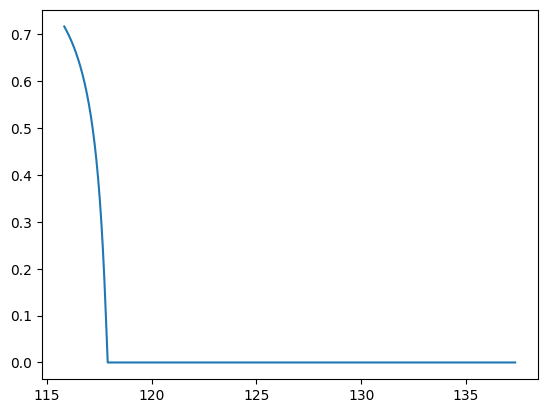

In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

In [4]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']
mwc_Rho_U = objects['mwc_Rho_U']
mwc_Rho_Rho = objects['mwc_Rho_Rho']

In [5]:
from Multiworker_Contract_hire_Rho import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

In [6]:
import valuefunction_general
J1p = valuefunction_general.PowerFunctionGrid(mwc_Rho_W,mwc_Rho_J,mwc_Rho.N_grid,mwc_Rho.N_grid1)

In [7]:
J1p.gamma_all[2,1,0]

8.703405354297518

In [7]:
J1p.rsqr

array([[0.00376933],
       [0.00506755],
       [0.00293233]])

In [11]:
Xi_pow = np.power( (J1p.gamma_all[1,7,0] + np.exp(J1p.gamma_all[1,3,0]) - mwc_Rho_W[1,...,0,1])/ 100.0 , J1p.gamma_all[1,2,0])
Jpp=J1p.gamma_all[1,0,0]+J1p.gamma_all[1,6,0] * np.power(mwc_Rho.sum_size[1,...,0],J1p.gamma_all[1,4,0]) + J1p.gamma_all[1,1,0] * mwc_Rho.size[1,...,0,1] * Xi_pow + J1p.gamma_all[1,5,0] * mwc_Rho.size[1,...,0,0]

In [25]:
J1p.gamma_all[1,1,0]

8.660316467799417

In [8]:
Jp=J1p.eval_at_W1(mwc_Rho_W[...,1])

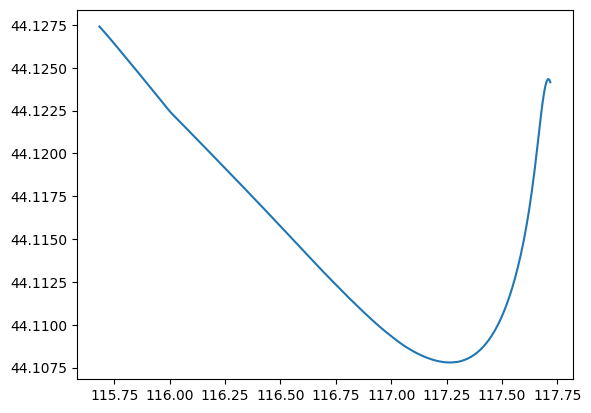

In [29]:
prod = p.z_0-1
j=0
s=0
minv= 0
plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_J[prod,j,s,:,0])
#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],J1p.eval_at_W1(mwc_Rho_W[...,1])[prod,j,s,:,0])
#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_Rho[prod,j,s,:,0]) #Why is Rho convex??? Why J is concave? Also it's not smooth at highest productivity, effect of hiring i'd wager
#plt.plot(mwc_Rho.w_grid,mwc_Rho_W[p.z_0-1,j,s,:,0,1])
#plt.plot(mwc_Rho.w_grid,mwc_Rho_J[p.z_0-1,j,s,:,0])

In [ ]:
#Non approximated version first

from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_pc,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J()

objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
objects['mwc_Rho_U'] = mwc_Rho_U
objects['mwc_Rho_Rho'] = mwc_Rho_Rho
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']
mwc_Rho_U = objects['mwc_Rho_U']
mwc_Rho_Rho = objects['mwc_Rho_Rho']

profiler = cProfile.Profile()
profiler.enable()
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_pc,mwc_Rho_n0,mwc_Rho_n1,mwc_Rho_J1p)=mwc_Rho.J(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,1)
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
#stats.print_stats()

objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
objects['mwc_Rho_U'] = mwc_Rho_U
objects['mwc_Rho_Rho'] = mwc_Rho_Rho
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [4]:
from Multiworker_Contract_GE import MultiworkerContract
mwc_GE=MultiworkerContract(p)

In [ ]:
# GE basic
mwc_GE_J = objects['mwc_Rho_J']
mwc_GE_W = objects['mwc_Rho_W']
mwc_GE_U = objects['mwc_Rho_U']

#(mwc_GE_J,mwc_GE_W,mwc_GE_Wstar,mwc_GE_sep,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J(None,None,None,1)
(mwc_GE_J,mwc_GE_W,mwc_GE_Wstar,mwc_GE_sep,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J(mwc_GE_J,mwc_GE_W,mwc_GE_U,1)

objects['mwc_GE_J'] = mwc_GE_J
objects['mwc_GE_W'] = mwc_GE_W
objects['mwc_GE_U'] = mwc_GE_U
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

So... why is it even the case that two different definitions of Rho give different results? 
Why is ERho_star - rho_star*n1_star*EW_star different from EJ_star? Especially after the approximation?

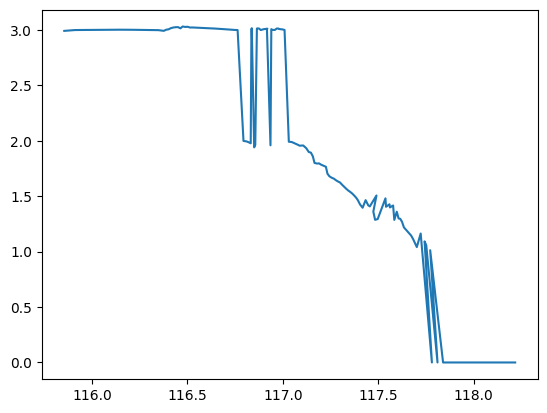

In [11]:
prod = p.z_0-0
j=0
s=1
#plt.plot(mwc_W[p.z_0-1,0,1,:,1],mwc_J[p.z_0-1,0,1,:])
#plt.plot(mwc.w_grid,mwc_n0[p.z_0,0,0,:])
#plt.plot(mwc.w_grid,mwc_W[p.z_0,0,1,:,1])
#plt.plot(mwc_W[p.z_0,0,1,:,1],mwc_n0[p.z_0,0,1,:])
#plt.plot(mwc_W[p.z_0-1,1,1,:,1],mwc_n0[p.z_0-1,1,1,:])
plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_n0[prod,j,s,:,0])
#plt.plot(mwc_GE_W[prod,j,s,:,0,1],mwc_GE_n0[prod,j,s,:,0])
#plt.plot(mwc_Rho_s_W[prod,j,s,:,0,1],mwc_Rho_s_n0[prod,j,s,:,0])


#Something is very wrong here, for some reason, when the seniors are the "cheapest" (lowest w_grid), the firm doesn't hire???
#Also the top part is still...kinda weird
#Also no hiring at 1 junior, but hiring at 1 senior???

In [ ]:
# GE separations
if results is None:
    mwc_GE_s_J = objects['mwc_GE_J']
    mwc_GE_s_W = objects['mwc_GE_W']
else:
    mwc_GE_s_J = results['Ji']
    mwc_GE_s_W = results['W1i']

(mwc_GE_s_J,mwc_GE_s_W,mwc_GE_s_Wstar,mwc_GE_s_sep,mwc_GE_s_n0,mwc_GE_s_n1)=mwc_GE.J_sep_dir(mwc_GE_J,mwc_GE_W,1)

objects['mwc_GE_s_J'] = mwc_GE_s_J
objects['mwc_GE_s_W'] = mwc_GE_s_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
if results is None:
    mwc_Rho_s_J = objects['mwc_Rho_s_J']
    mwc_Rho_s_W = objects['mwc_Rho_s_W']
    mwc_Rho_s_W = objects['mwc_Rho_s_U']    
else:
    mwc_Rho_s_J = results['J']
    mwc_Rho_s_W = results['W']
    

(mwc_Rho_s_J,mwc_Rho_s_W,mwc_Rho_s_U,mwc_Rho_s_Rho,mwc_Rho_s_Wstar,mwc_Rho_s_sep,mwc_Rho_s_n0,mwc_Rho_s_n1)=mwc_Rho.J_sep_dir(mwc_Rho_J,mwc_Rho_W)

objects['mwc_Rho_s_J'] = mwc_Rho_s_J
objects['mwc_Rho_s_W'] = mwc_Rho_s_W
objects['mwc_Rho_s_U'] = mwc_Rho_s_U

with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
from Multiworker_Contract_all import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n0,mwc_n1)=mwc.J()

# Plots

In [15]:
output_dir = 'Plots'
if not os.path.exists(output_dir):
         os.makedirs(output_dir)

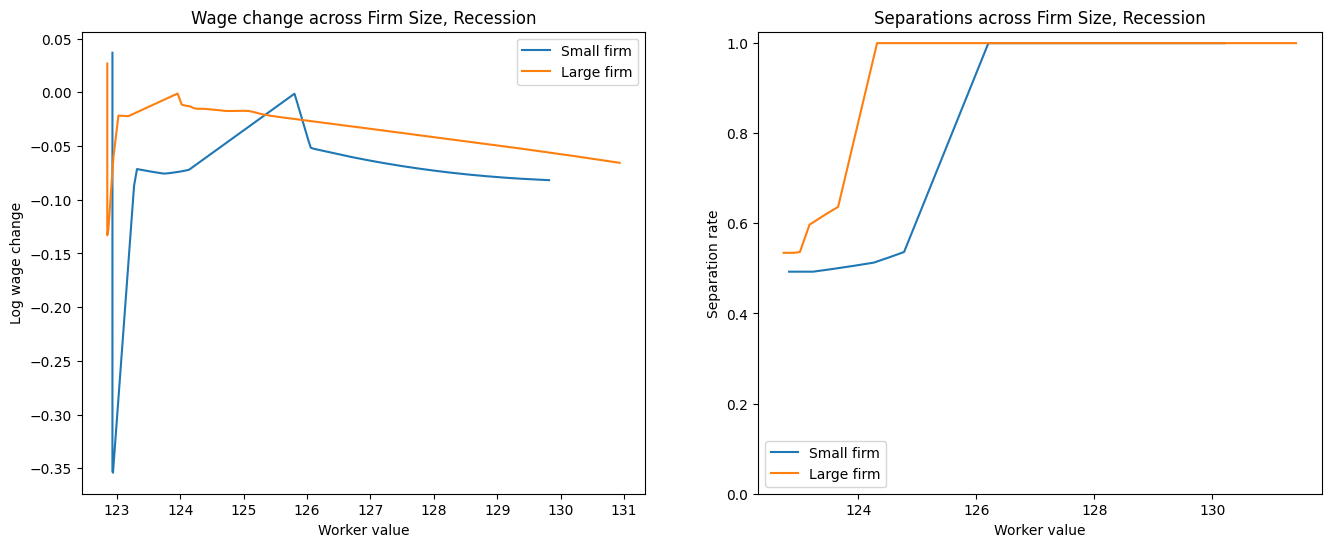

In [16]:
        #THIS IS SOMEHOW THE OPPOSITE??? In firms with many juniors wage drops are larger?? Why?? I guess they don't care for that many seniors?
        #But then why would it equialize afterwards... AHHH BECAUSE ALL THE JUNIORS ARE ALREADY FIRED
        #Now 1,3 places much higher weight on its expensive seniors hencewhy wage drop not that large...? WAGE DROP BOUNCES UP A BIT WHEN THEY START FIRING
        #Still can't understand why 1,1 goes for full firing earlier tho... Also at the same time that complete firing happens, wage drops amplify... guess that makes sense tho
        save=1
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1) 
        # Plot the data
        #plt.plot(mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 1 ,:, 5]-mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5],mwc_Rho_s_W[0,1,1,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5],mwc_Rho_s_W[0,1,3,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Large firm')

        #plt.plot(mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 3 ,:, 5]-mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], label='Larger firm')
        #plt.plot(baseline_W[0, 3, 1 ,:, 5, 1], baseline_Wstar[0, 3, 1 ,:, 5]-baseline_W[0, 3, 1 ,:, 5, 1], label='Larger firm wage')
        #if mwc_s_W is not None:
        #    plt.plot(mwc_s_W[p.z_0-1, 0, 1,:, 1], mwc_s_Wstar[p.z_0-1, 0, 1, :]-mwc_s_W[p.z_0-1, 0, 1,:, 1], label='DRS with separations')
        #if mwc_s_dir_W is not None:
        #    plt.plot(mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], mwc_s_dir_Wstar[p.z_0-1, 0, 1, :]-mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], label='DRS with direct separations')
        plt.legend()
        # Add titles and labels
        plt.title('Wage change across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Log wage change')

        # Secone subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

        plt.plot(mwc_Rho_s_W[0, 1, 1, :, 0 ,1], mwc_Rho_s_sep[0, 1, 1, :, 0], label='Small firm')
        plt.plot(mwc_Rho_s_W[0, 1, 3, :, 0 ,1], mwc_Rho_s_sep[0, 1, 3, :, 0], label='Large firm')

        plt.legend()
        # Add titles and labels
        plt.title('Separations across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Separation rate')
        plt.ylim(ymin=0)
        if save==1:
          plt.savefig(os.path.join(output_dir,'Log wage cuts and Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

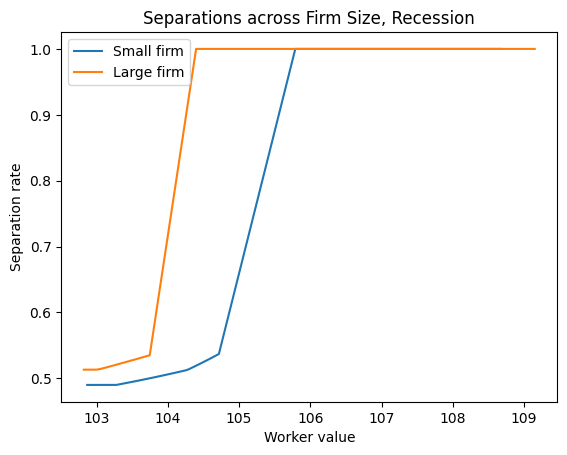

In [28]:

if save==1:
        plt.savefig(os.path.join(output_dir,'Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

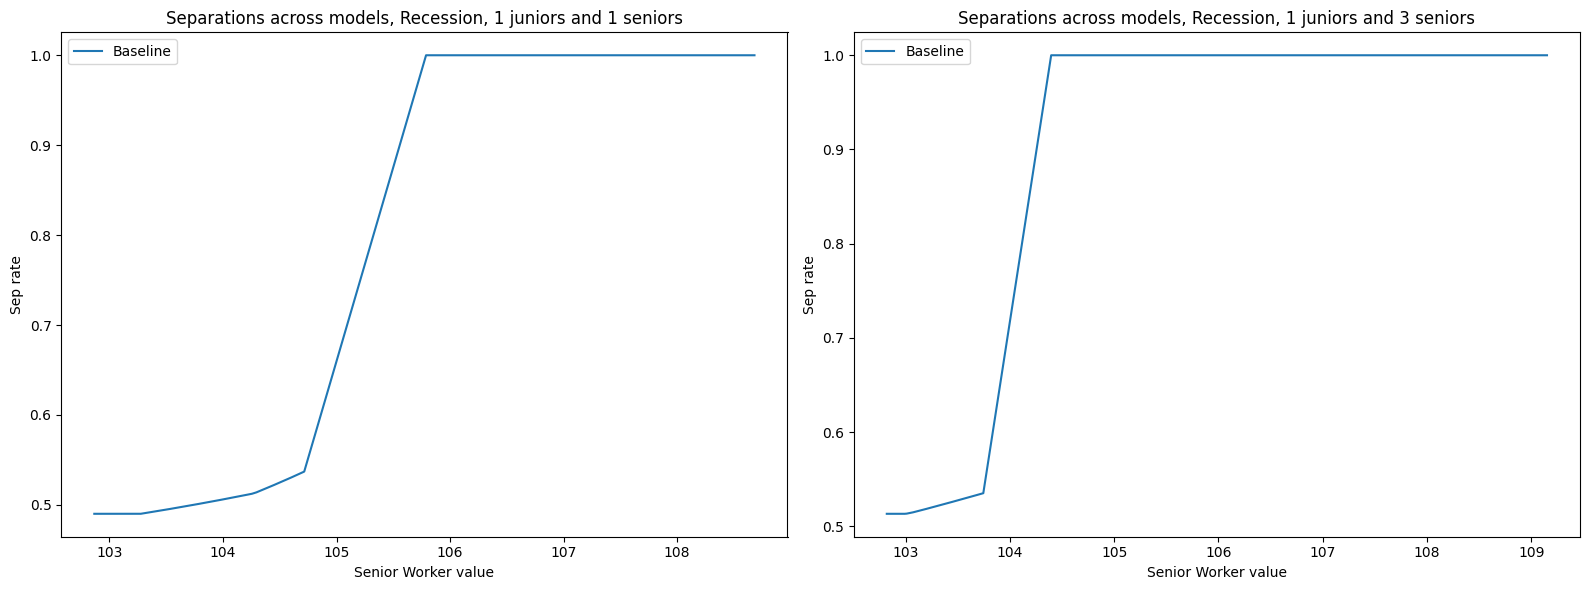

In [14]:
plot_sep(0,0,    1,1,    1,3,    0,  0,0,    0)

In [11]:
def plot_sep(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1

        #plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_sep[prod1, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod1, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod1, jun, sen, :, qual], label='Baseline')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2

        #plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod2, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [7]:
names = [ 'DRS HMQ', 'DRS HMQ via RHO', 'HMQ']

In [ ]:
plts.CRSvsDRSvalue(names,cc_W,cc_J,mwc_hmq_W[...,0,:],mwc_Rho_J[...,0],mwc_Rho_W[...,0,:],mwc_Rho_J[...,0],None,None,0)

In [9]:
def plot_GE(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
       
        plt.plot(mwc_GE_W[prod1, jun, sen, :, qual ,1], mwc_GE_J[prod1, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_J[prod1, jun, sen, :, qual], label='With separations')


     

        if prod1 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        plt.plot(mwc_GE_W[prod2, jun, sen, :, qual ,1], mwc_GE_J[prod2, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_J[prod2, jun, sen, :, qual], label='With separations')

       
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'General Equilibrium Value Function.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plot_GE(2,0,    1,2,    1,1,    0,  0,0,    0)

In [6]:
baseline_sep = objects['baseline_sep']
baseline_W = objects['baseline_W']
baseline_Wstar = objects['baseline_Wstar']


noHMQ_sep = objects['noHMQ_sep']
noHMQ_W = objects['noHMQ_W']
noHMQ_Wstar = objects['noHMQ_Wstar']
nohire_sep = objects['nohire_sep']
nohire_W = objects['nohire_W']
nohire_Wstar = objects['nohire_W']
hiresub_sep = objects['hiresub_sep']
hiresub_W = objects['hiresub_W']
hiresub_Wstar = objects['hiresub_Wstar']

In [7]:
import os
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
def plott(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
        if baseline_W is not None:        
            plt.plot(baseline_W[prod1, jun, sen, 5:50, qual ,1], baseline_sep[prod1, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod1, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod1, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod1, jun, sen, 5:50, qual ,1], nohire_sep[prod1, jun, sen, 5:50, qual], label='CRS') #Not true CRS but still
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod1, jun, sen, 5:50, qual, 1], noHMQ_sep[prod1, jun, sen, 5:50, qual], label='No match heterog')
        #if minwage_W is not None: 
        # if minwage ==1: 
        #  plt.plot(minwage_W[prod1, jun, sen, 5:50, qual, 1], minwage_sep[prod1, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod1, jun, sen, 5:50, qual, 1], hiresub_sep[prod1, jun, sen, 5:50, qual], label='Hiring subsidy')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, jun, sen, 5:50, qual, 1], baseline_sep[prod2, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod2, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod2, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod2, jun, sen, 5:50, qual, 1], nohire_sep[prod2, jun, sen, 5:50, qual], label='CRS')  
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod2, jun, sen, 5:50, qual, 1], noHMQ_sep[prod2, jun, sen, 5:50, qual], label='No match heterog')     
        #if minwage_W is not None:
        # if minwage == 1:  
        #  plt.plot(minwage_W[prod2, jun, sen, 5:50, qual, 1], minwage_sep[prod2, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod2, jun, sen, 5:50, qual, 1], hiresub_sep[prod2, jun, sen, 5:50, qual], label='Hiring subsidy')            
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plott(0,0,  1,3,    2,2,    5,0,0,save=0)

In [ ]:
plott(0,0,  1,1,    1,3,    5, 0,0, save=0)

In [ ]:
        prod2=0
        save=1
        qual = 5
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 1, 5:, qual, 1], baseline_sep[prod2, 1, 1, 5:, qual], label='Small firm')
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Larger firm')  
        #if baseline_W is not None:        
        
        #plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Many seniors')     
         
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across size, Boom')
        elif prod2 == 0:
          plt.title(f'Separations across size, Recession')
        else:
          plt.title(f'Separations across size, {prod} productivity')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations across size new.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
#This is no DRS/hiring. Even less firing than no HMQ

plts.sep(0,p.z_0,1,3,1,3,None,None,noHMQ_W[...,1,:],noHMQ_sep[...,1])

In [ ]:
plts.CRSvsDRSpolicy(cc_W,cc_Wstar,baseline_W[...,0,:],baseline_Wstar[...,0],nohire_W[...,0,:],baseline_Wstar[...,0],None,None,0)

In [ ]:
plts.CRSvsDRSdirect(cc_J,mwc_J,0)

In [ ]:
plts.CRSvsDRSsurplus(cc_J,cc_W,mwc_J,mwc_W,0)

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
            #something like: sep_star = interp(0,foc_sep,sep_grid) + extra conditions
            #need derivatives of future expectations!
            # for that, I interpolate onto rho_star,n0_star, and one of n1_s/q_s. If I'm looking for derivative wrt size, I interpolate onto q_s and THEN take the difference between two discrete values
            #n1_s[iz,in0,in1,iv,iq,s] = (N_grid[in0]*(1-sep_grid[s])+N_grid1[in1]) * pc_temp[iz,in0,in1,iv] #Gives me sep for every damn value hell yeah
            #n1_s_ceil = np.ceil(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #n1_s_floor = np.floor(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #J_n1[iz,...,s,in11] = RegularGridInterpolator((N_grid, rho_grid, Q_grid), EJpi[iz, :, in11, ...], bounds_error=False, fill_value=None) ((n0_star[iz, ...], rho_star[iz, ...], q_s[iz, ...,s]))
            #J_fut_deriv_n[...,s] = (J_n1[...,s,n1_s_ceil[...,s]] - J_n1[...,s,n1_s_floor[...,s]] ) / (N_grid1[n1_s_ceil[...,s]] - N_grid1[n1_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (n1_s_ceil==0), last_bound = (N_grid1[n1_s_floor]==n_bar)
            #J_fut_deriv_n[first_bound] = (J_n1[first_bound,1] - J_n1[first_bound,0] ) / (N_grid1[1] - N_grid1[0])
            #J_fut_deriv_n[last_bound] = (J_n1[last_bound,-1] - J_n1[last_bound,-2] ) / (N_grid1[-1] - N_grid1[-2])
 
            #q_s = (N_grid[self.grid[1]] * (self.p.q_0 - np.max(sep_grid[s]-( 1- self.p.q_0),0))+Q_grid[self.grid[4]]*N_grid1[self.grid[2]]) / (N_grid[self.grid[1]]*(1-sep_grid[s])+N_grid1[self.grid[2]])
            #J_q[iz,...,s,iqq] = RegularGridInterpolator((N_grid, N_grid1, rho_grid), EJpi[iz, ..., iqq], bounds_error=False, fill_value=None) ((n0_star[iz, ...], n1_s[iz,...,s], rho_star[iz, ...]))
            #J_fut_deriv_q[...,s] = (J_q[...,s,q_s_ceil[...,s]] - J_n1  [...,s,q_s_floor[...,s]] ) / (Q_grid[q_s_ceil[...,s]] - Q_grid[q_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (q_s_ceil==0), last_bound = (Q_grid[q_s_floor]=1.0)
            #J_fut_deriv_q[first_bound] = (J_q[first_bound,1] - J_q[first_bound,0] ) / (Q_grid1[1] - Q_grid1[0])
            #J_fut_deriv_q[last_bound] = (J_q[last_bound,-1] - J_q[last_bound,-2] ) / (Q_grid1[-1] - Q_grid1[-2])
            #q_deriv_s = N_grid[grid[1]] * q_s / (N_grid1[grid[2]]+(1-sep_grid[s])*N_grid[grid[1]]) #Probably need to loop over s. Not efficient, but simpler than redoing the whole self.grid thing
            #worker_fut_value = interp ( rho_star,rho_grid,re+EW1i)                    #This is because we don't yet have the worker future value yet. OR just use EW1_star and re_star??? a little risky but possible.
            #Could be a good start
            #foc_sep[...,s] = - J_fut_deriv[...,s] * pc_temp + J_fut_deriv_q * q_deriv_s - (re+EW1i - EUi) / self.pref.inv_utility_1d(self.v_0-self.p.beta*(s_grid[s] * EUi + (1-s_grid[s]) * (EW1_star + re_star)
            # sep_neg = np.all (foc <= 0, axis = -1)
            # sep_max = np.all (foc > 0, axis = -1)
            # sep_star[sep_neg] = 0
            # sep_star[sep_max] = 1.0 #OH SHIT WHAT IF THE Q IS ALREADY AT ITS MAX? I think this should account for it, no?
            #sep_star = interp_multidim(0,-impose_decreasing(foc_sep),sep_grid) 